In [13]:
import numpy as np
import pandas as pd
from pandas import read_csv
from pandas import datetime
from matplotlib import pyplot as plt
from pandas.core import datetools
from pandas import Series, DataFrame

from pandas.tools.plotting import autocorrelation_plot
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf


In [14]:
df=pd.read_csv('Boeing_daily.csv')

In [15]:
SP=pd.read_csv('SP.csv')

In [16]:
oil=pd.read_csv('oil-prices.csv')

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2515 entries, 0 to 2514
Data columns (total 7 columns):
Date         2515 non-null object
Open         2515 non-null float64
High         2515 non-null float64
Low          2515 non-null float64
Close        2515 non-null float64
Adj Close    2515 non-null float64
Volume       2515 non-null int64
dtypes: float64(5), int64(1), object(1)
memory usage: 137.6+ KB


In [18]:
SP.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2009-04-30,876.590027,888.700012,868.510010,872.809998,872.809998,6862540000
1,2009-05-01,872.739990,880.479980,866.099976,877.520020,877.520020,5312170000
2,2009-05-04,879.210022,907.849976,879.210022,907.239990,907.239990,7038840000
3,2009-05-05,906.099976,907.700012,897.340027,903.799988,903.799988,6882860000
4,2009-05-06,903.950012,920.280029,903.950012,919.530029,919.530029,8555040000


In [19]:
df.columns=['Date', 'Open', 'High', 'Low', 'Close', 'Adj_Close', 'Volume']

In [20]:
SP.columns=['Date', 'Open', 'High', 'Low', 'Close', 'Adj_Close_SP', 'Volume']

In [21]:
df['Date']=pd.to_datetime(df["Date"])
SP['Date']=pd.to_datetime(SP["Date"])

In [22]:
df=df[["Date",'Adj_Close',"Volume"]]

In [23]:
SP=SP[["Date",'Adj_Close_SP']]

In [24]:
oil['date']=pd.to_datetime(oil["date"])
oil.tail()

,date,value
2513,2019-04-23,66.30
2514,2019-04-24,65.89
2515,2019-04-25,65.21
2516,2019-04-26,63.30
2517,2019-04-29,63.50


In [25]:
oil.columns=["Date","Oil_price"]

In [26]:
data=df.merge(oil,on="Date",how='left')
data=data.merge(SP,on="Date",how='left')

In [27]:
#data=data.set_index(data.Date)
#data=data.drop("Date",axis=1)

In [28]:
data.head()

,Date,Adj_Close,Volume,Oil_price,Adj_Close_SP
0,2009-05-01,31.726078,5508800,53.20,877.520020
1,2009-05-04,32.472832,5269800,54.47,907.239990
2,2009-05-05,33.219616,7683900,53.84,903.799988
3,2009-05-06,34.362438,7930300,56.34,919.530029
4,2009-05-07,33.841553,7106700,56.71,907.390015


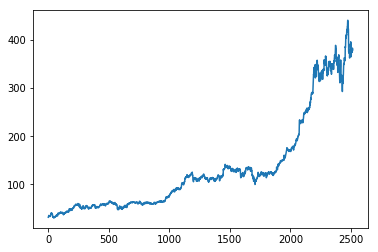

In [29]:
data["Adj_Close"].plot()
plt.show()

In [30]:
data.to_csv('all.csv',index=False)